# ML Zoomcamp 3.1 - Churn Prediction Project

#### In this lesson we are going work on creating a clssification model
#### The project is all about identifying customers churn likelihood with personalized offers
#### Preventing customer churn with accurate discounts using machine learning

# ML Zoomcamp 3.2 - Data Preparation

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("telco-customer-churn.csv")

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [4]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [5]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

#### Replacing missing data with 'not a number' value

In [6]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [7]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [8]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


#### Converting churn variable

In [9]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [10]:
df.churn = (df.churn == 'yes').astype(int)

In [11]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


# ML Zoomcamp 3.3 - Setting Up The Validation Framework with Scikit-learn

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# we use random_state to make the results reproduceable

In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [15]:
len(df_full_train), len(df_test)

(5634, 1409)

In [16]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [17]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [20]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# ML Zoomcamp 3.4 - EDA

In [21]:
df_full_train = df_full_train.reset_index(drop=True)

In [22]:
# check for null values

In [23]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

#### Analyzing churn and categorical/numerical variables

In [24]:
# check target variable counts (0, 1)
# also called as churn rate (1)

In [25]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [26]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [27]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [28]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [29]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [30]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [31]:
# calculate each unique values in each column of categorical

In [32]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# ML Zoomcamp 3.5 - Feature Importance: Churn Rate And Risk Ratio

##### Different ways on measuring different categorical variables

### (1) Difference
#### This gives us one way of measuring feature importance
#### If global is greater than the feature, then the group is less likely to churn
#### If global is greater then the feaute is more likely to churn
#### We are only interested on having a larger churn rate than a lesser one
#####
### (2) Risk ratio
#### Risk = group/global
#### If it is > 1 then it is more likely to churn, if <, it is less likely

##### Churn rate

In [33]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [34]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()

In [35]:
churn_female, churn_male

(0.27682403433476394, 0.2632135306553911)

In [36]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [37]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [38]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()

In [39]:
churn_partner, churn_no_partner

(0.20503330866025166, 0.3298090040927694)

In [40]:
# this only says that no matter what gender, the churn rate does not matter
# compared to when the person has a partner

##### Risk ratio

In [41]:
churn_no_partner / global_churn

1.2216593879412643

In [42]:
churn_partner / global_churn

0.7594724924338315

#### We compare the results using a bar graph with the global churn rate as the baseline

In [43]:
from IPython.display import display

In [44]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# ML Zoomcamp 3.6 - Feature Importance: Mutual Information

##### Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

#### Using mutual information to predict churn

In [45]:
# Scikit-Learn class for calculating the mutual information between the x target variable and y feature

In [46]:
from sklearn.metrics import mutual_info_score

In [47]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [48]:
# display the churn score for each categorical columns to determine the importance of each categories

In [49]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# ML Zoomcamp 3.7 - Feature Importance: Correlation

##### Measuring the degree of dependency between two variables

#### Correlation Coefficient Example
#### Low Relation (Rarely)
##### 0.0 - 0.1 positive correlation
##### -0.1 - 0.0 negative correlation
#### Moderate Relation (Sometimes)
##### 0.2 - 0.5 positive correlation
##### -0.2 - -0.5 negative correlation
#### Strong Relation (Often/Always)
##### 0.6 - 1.0 positive correlation
##### -0.6 - -1 negative correlation

##### Postive - the more the X, the higher the Y (in this case the churn)
##### Negative - the more the X, the lesser the Y (in this case the churn)
##### Zero - no effect

In [50]:
df_full_train.tenure.max()

72

In [51]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

#### Negative Correlation
#### Churn rate decreases with longer tenure

In [52]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [53]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [54]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

##### Positive Correlation
##### Monthly charges increases with higher monthly charges

In [55]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [56]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [57]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

# ML Zoomcamp 3.8 - One-Hot Encoding

In [58]:
from sklearn.feature_extraction import DictVectorizer

In [59]:
# df[x].to_dict(oriented='records') - convert x series to dictionaries, oriented by rows.

In [60]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [61]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

#### Create feature matrix using DicVectorizer

In [62]:
dv = DictVectorizer(sparse=False)

In [63]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [64]:
X_train = dv.fit_transform(train_dicts)

In [65]:
X_val = dv.transform(val_dicts)

In [66]:
X_train.shape, X_val.shape

((4225, 45), (1409, 45))

In [68]:
# once the training dataset is fitted and transformed, the validation dataset does not need to be fitted again and just needs to be transformed.
# the validation dataset should be processed the same way as the training data.
# if you refit on the validation set, it would learn different parameters based on the validation data, which is not desirable.

In [69]:
# now our feature matrices for training and validation are ready

# ML Zoomcamp 3.9 - Logistic Regression

#### - Binary Classification
#### - Linear vs Logistic Regression

In [70]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [71]:
z = np.linspace(-7, 5, 51)
sigmoid(z)

array([9.11051194e-04, 1.15788692e-03, 1.47150060e-03, 1.86989753e-03,
       2.37590057e-03, 3.01841632e-03, 3.83402011e-03, 4.86893124e-03,
       6.18146089e-03, 7.84502303e-03, 9.95180187e-03, 1.26171607e-02,
       1.59848483e-02, 2.02329971e-02, 2.55807883e-02, 3.22954647e-02,
       4.06990536e-02, 5.11737009e-02, 6.41638764e-02, 8.01729122e-02,
       9.97504891e-02, 1.23467048e-01, 1.51871164e-01, 1.85427419e-01,
       2.24435986e-01, 2.68941421e-01, 3.18646266e-01, 3.72852234e-01,
       4.30453776e-01, 4.90001333e-01, 5.49833997e-01, 6.08259031e-01,
       6.63738697e-01, 7.15042106e-01, 7.61332715e-01, 8.02183889e-01,
       8.37534937e-01, 8.67611126e-01, 8.92831930e-01, 9.13725806e-01,
       9.30861580e-01, 9.44799462e-01, 9.56060185e-01, 9.65108591e-01,
       9.72347578e-01, 9.78118729e-01, 9.82706843e-01, 9.86346341e-01,
       9.89228270e-01, 9.91507137e-01, 9.93307149e-01])

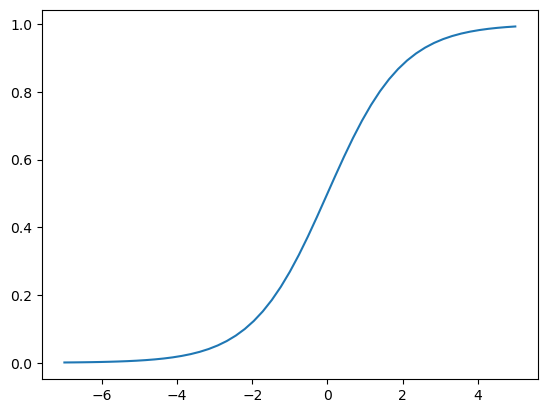

In [72]:
plt.plot(z, sigmoid(z))

In [73]:
# comparison of linear regression and logistic regression

In [74]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

In [75]:
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result

# ML Zoomcamp 3.10 - Training Logistic Regression with Scikit-Learn

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [78]:
model.intercept_[0]

-0.12193598860157635

In [79]:
model.coef_[0].round(3)

array([ 0.607, -0.058, -0.671, -0.028, -0.094,  0.052, -0.103, -0.071,
       -0.042, -0.08 , -0.376,  0.357, -0.103,  0.002, -0.248,  0.133,
       -0.008,  0.057, -0.103, -0.076,  0.217, -0.103, -0.236, -0.249,
        0.127, -0.116, -0.006, -0.101, -0.049,  0.067, -0.04 ,  0.133,
       -0.255,  0.199, -0.101, -0.103,  0.082, -0.064, -0.103,  0.045,
        0.17 , -0.103, -0.189, -0.067,  0.   ])

In [80]:
y_pred = model.predict_proba(X_val)[:, 1]

In [81]:
y_pred

array([0.00735889, 0.20971757, 0.22070437, ..., 0.14887918, 0.78483979,
       0.8105809 ])

In [82]:
churn_decision = (y_pred >= 0.5)

#### See how accurate our predictions are using 

In [83]:
(y_val == churn_decision).mean()

0.8055358410220014

In [84]:
df_pred = pd.DataFrame()
df_pred['probablity'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [85]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [86]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [87]:
df_pred.correct.mean()

0.8055358410220014

# ML Zoomcamp 3.11 - Model Interpretation

In [88]:
model.coef_[0].round(3)

array([ 0.607, -0.058, -0.671, -0.028, -0.094,  0.052, -0.103, -0.071,
       -0.042, -0.08 , -0.376,  0.357, -0.103,  0.002, -0.248,  0.133,
       -0.008,  0.057, -0.103, -0.076,  0.217, -0.103, -0.236, -0.249,
        0.127, -0.116, -0.006, -0.101, -0.049,  0.067, -0.04 ,  0.133,
       -0.255,  0.199, -0.101, -0.103,  0.082, -0.064, -0.103,  0.045,
        0.17 , -0.103, -0.189, -0.067,  0.   ])

In [89]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [90]:
# we use the zip() function

In [91]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.607,
 'contract=one_year': -0.058,
 'contract=two_year': -0.671,
 'dependents=no': -0.028,
 'dependents=yes': -0.094,
 'deviceprotection=no': 0.052,
 'deviceprotection=no_internet_service': -0.103,
 'deviceprotection=yes': -0.071,
 'gender=female': -0.042,
 'gender=male': -0.08,
 'internetservice=dsl': -0.376,
 'internetservice=fiber_optic': 0.357,
 'internetservice=no': -0.103,
 'monthlycharges': 0.002,
 'multiplelines=no': -0.248,
 'multiplelines=no_phone_service': 0.133,
 'multiplelines=yes': -0.008,
 'onlinebackup=no': 0.057,
 'onlinebackup=no_internet_service': -0.103,
 'onlinebackup=yes': -0.076,
 'onlinesecurity=no': 0.217,
 'onlinesecurity=no_internet_service': -0.103,
 'onlinesecurity=yes': -0.236,
 'paperlessbilling=no': -0.249,
 'paperlessbilling=yes': 0.127,
 'partner=no': -0.116,
 'partner=yes': -0.006,
 'paymentmethod=bank_transfer_(automatic)': -0.101,
 'paymentmethod=credit_card_(automatic)': -0.049,
 'paymentmethod=electronic_check': 0.067

In [92]:
small = ['contract', 'tenure', 'monthlycharges']

In [93]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [94]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [95]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [96]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [97]:
X_train_small = dv_small.transform(dicts_train_small)

In [98]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [99]:
w0 = model_small.intercept_[0]
w0

-2.4779575940625937

In [100]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [101]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.971,
 'contract=one_year': -0.024,
 'contract=two_year': -0.948,
 'monthlycharges': 0.027,
 'tenure': -0.036}

# ML Zoomcamp 3.12 - Using the Model

#### Training model using all features

In [102]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dicts_full_train[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'two_year',
 'paperlessbilling': 'no',
 'paymentmethod': 'mailed_check',
 'tenure': 12,
 'monthlycharges': 19.7,
 'totalcharges': 258.35}

In [103]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
X_full_train[0]

array([  0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,   1.  ,  19.7 ,   1.  ,   0.  ,
         0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ,
         0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,
         0.  ,   1.  ,   0.  ,  12.  , 258.35])

In [104]:
y_full_train = df_full_train.churn.values
y_full_train[0]

0

In [105]:
model = LogisticRegression(solver='liblinear')
model.fit(X_full_train, y_full_train)

LogisticRegression(solver='liblinear')

In [106]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [107]:
X_test = dv.transform(dicts_test)

In [108]:
y_pred = model.predict_proba(X_test)[:, 1]

In [109]:
y_pred

array([0.05927902, 0.12372775, 0.32716619, ..., 0.00677946, 0.20057115,
       0.64341162])

In [110]:
churn_decision = (y_pred >= 0.5)

In [111]:
(churn_decision == y_test).mean()

0.8126330731014905

In [112]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [113]:
X_small = dv.transform([customer])

In [114]:
X_small.shape

(1, 45)

In [115]:
model.predict_proba(X_small)[0, 1]

0.6434116218223784

In [116]:
y_test[-1]

1